In [12]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 20-30대 (다운샘플링x)

In [26]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/youngrich/data/Loan.csv')  # 데이터 불러오기
df = df.drop('ApplicationDate',axis=1)
# 1. LoanApproved 변수를 범주형으로 변환
df['LoanApproved'] = df['LoanApproved'].map({1: 'Approved', 0: 'NotApproved'})
# 20~30대만 필터링 (20 <= Age <= 39)
df = df[(df['Age'] >= 20) & (df['Age'] <= 39)]


# 수치형 데이터를 범주형 데이터로 변환
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns


# 각 수치형 컬럼에 대해 그룹 나누기
for col in numeric_columns:
    # 해당 컬럼의 데이터를 오름차순으로 정렬
    sorted_values = np.sort(df[col].values)

    # 각 컬럼의 길이를 4로 나누어서 인덱스 분배
    group_size = len(sorted_values) // 4

    # 4등분한 구간의 인덱스를 구하고, 해당 구간에 값을 할당
    group_labels = np.concatenate([
        np.full(group_size, '1'),  # 1그룹
        np.full(group_size, '2'),  # 2그룹
        np.full(group_size, '3'),  # 3그룹
        np.full(len(sorted_values) - 3 * group_size, '4')  # 4그룹 (나머지)
    ])

    # 그룹을 다시 원본 데이터프레임에 할당
    df[col] = group_labels

# 수치형 변수의 범주화된 컬럼에 대해 원핫 인코딩을 적용
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
one_hot_df = pd.get_dummies(df[categorical_columns], prefix_sep='=', drop_first= False)

# 범주형 변수를 원핫인코딩한 후 연관 규칙을 찾음
frequent_itemsets = apriori(one_hot_df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 0.0,num_itemsets=7)

#support 값으로 내림차순
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
# 'lift' 값으로 내림차순 정렬
sorted_rules = rules.sort_values(by='lift', ascending=False)

# 결과 출력
print("Frequent Itemsets:")
print(sorted_frequent_itemsets)

print("\nAssociation Rules:")
print(sorted_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

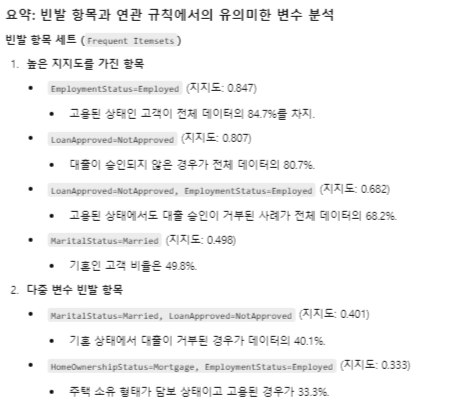

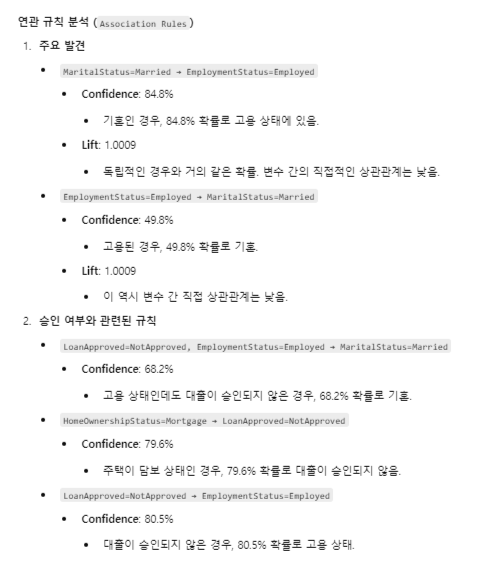

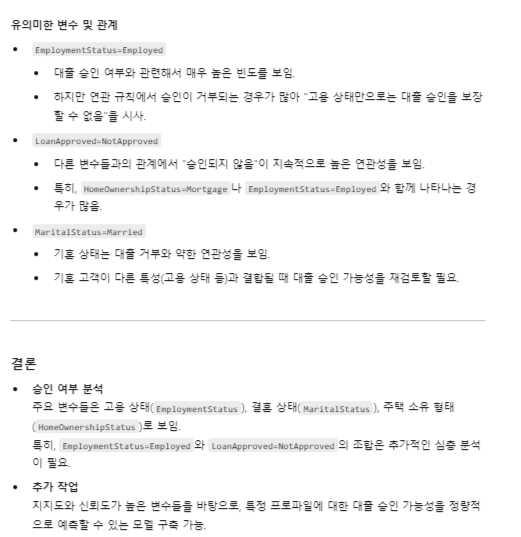

## 다운샘플링

In [14]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from sklearn.utils import resample
df = pd.read_csv('/content/drive/MyDrive/youngrich/data/Loan.csv')  # 데이터 불러오기
df = df.drop('ApplicationDate',axis=1)
# 20~30대만 필터링 (20 <= Age <= 39)
df = df[(df['Age'] >= 20) & (df['Age'] <= 39)]

# 1. 각 클래스별 데이터 분리
approved_df = df[df['LoanApproved'] == 1]
not_approved_df = df[df['LoanApproved'] == 0]

# 2. 소수 클래스 수에 맞춰 다운샘플링
min_count = min(len(approved_df), len(not_approved_df))

approved_downsampled = resample(approved_df,
                                replace=False,  # 복원 추출 여부
                                n_samples=min_count,  # 소수 클래스 샘플 수
                                random_state=42)

not_approved_downsampled = resample(not_approved_df,
                                    replace=False,
                                    n_samples=min_count,
                                    random_state=42)

# 3. 다운샘플링된 데이터 합치기
balanced_df = pd.concat([approved_downsampled, not_approved_downsampled])

# 4. 데이터 섞기 (선택 사항)
df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 1. LoanApproved 변수를 범주형으로 변환
df['LoanApproved'] = df['LoanApproved'].map({1: 'Approved', 0: 'NotApproved'})



# 수치형 데이터를 범주형 데이터로 변환
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns


# 각 수치형 컬럼에 대해 그룹 나누기
for col in numeric_columns:
    # 해당 컬럼의 데이터를 오름차순으로 정렬
    sorted_values = np.sort(df[col].values)

    # 각 컬럼의 길이를 4로 나누어서 인덱스 분배
    group_size = len(sorted_values) // 4

    # 4등분한 구간의 인덱스를 구하고, 해당 구간에 값을 할당
    group_labels = np.concatenate([
        np.full(group_size, '1'),  # 1그룹
        np.full(group_size, '2'),  # 2그룹
        np.full(group_size, '3'),  # 3그룹
        np.full(len(sorted_values) - 3 * group_size, '4')  # 4그룹 (나머지)
    ])

    # 그룹을 다시 원본 데이터프레임에 할당
    df[col] = group_labels

# 수치형 변수의 범주화된 컬럼에 대해 원핫 인코딩을 적용
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
one_hot_df = pd.get_dummies(df[categorical_columns], prefix_sep='=', drop_first= False)

# 범주형 변수를 원핫인코딩한 후 연관 규칙을 찾음
frequent_itemsets = apriori(one_hot_df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 0.1,num_itemsets=2)

#support 값으로 내림차순
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
# 'lift' 값으로 내림차순 정렬
sorted_rules = rules.sort_values(by='lift', ascending=False)

# 결과 출력
print("Frequent Itemsets:")
print(sorted_frequent_itemsets)

print("\nAssociation Rules:")
print(sorted_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
     support                                           itemsets
0   0.853771                        (EmploymentStatus=Employed)
2   0.502591                            (MaritalStatus=Married)
6   0.500000                            (LoanApproved=Approved)
7   0.500000                         (LoanApproved=NotApproved)
8   0.428900  (MaritalStatus=Married, EmploymentStatus=Emplo...
10  0.427461  (EmploymentStatus=Employed, LoanApproved=Appro...
11  0.426310  (LoanApproved=NotApproved, EmploymentStatus=Em...
4   0.398964                     (HomeOwnershipStatus=Mortgage)
9   0.342545  (EmploymentStatus=Employed, HomeOwnershipStatu...
1   0.317789                          (EducationLevel=Bachelor)
3   0.315486                             (MaritalStatus=Single)
5   0.311457                                 (LoanPurpose=Home)

Association Rules:
                      antecedents                     consequents  \
2     (EmploymentStatus=Employed)  (HomeOwnershipStatus=Mort

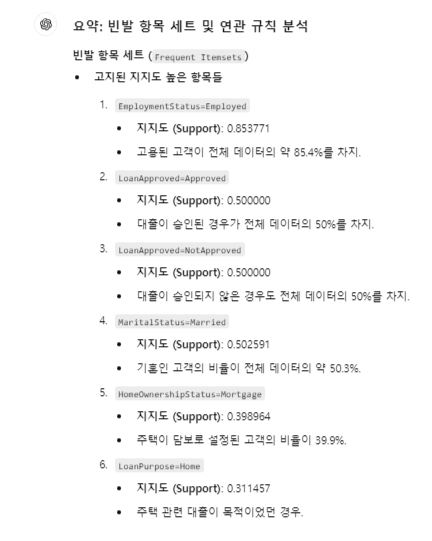

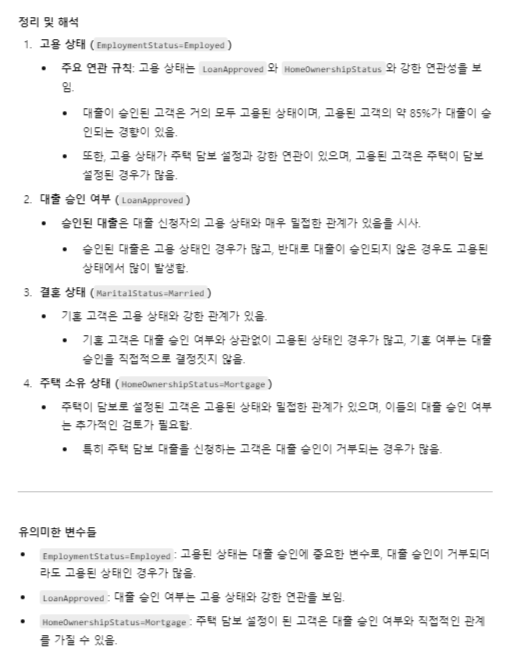

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


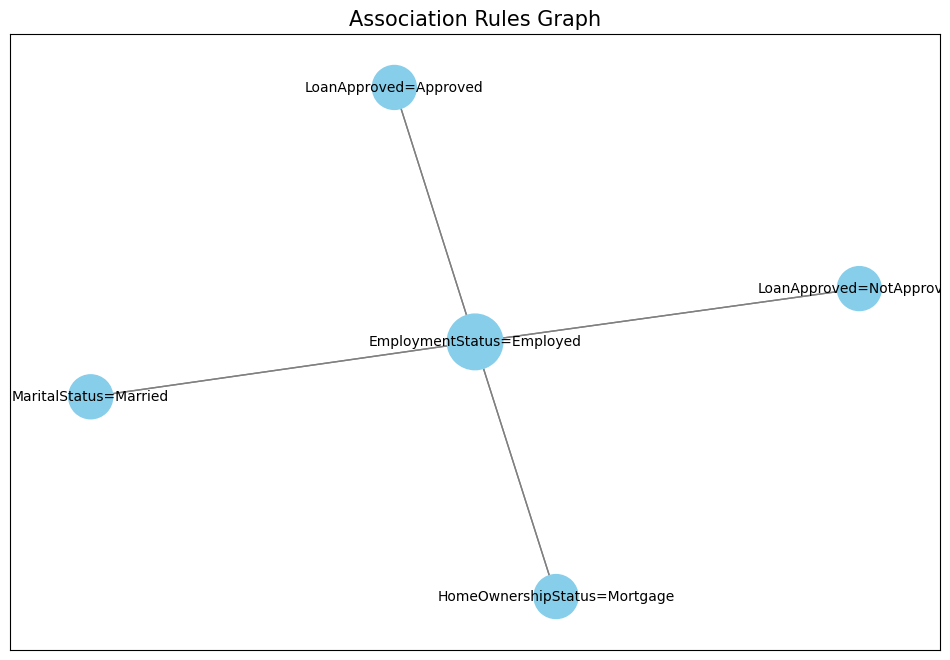

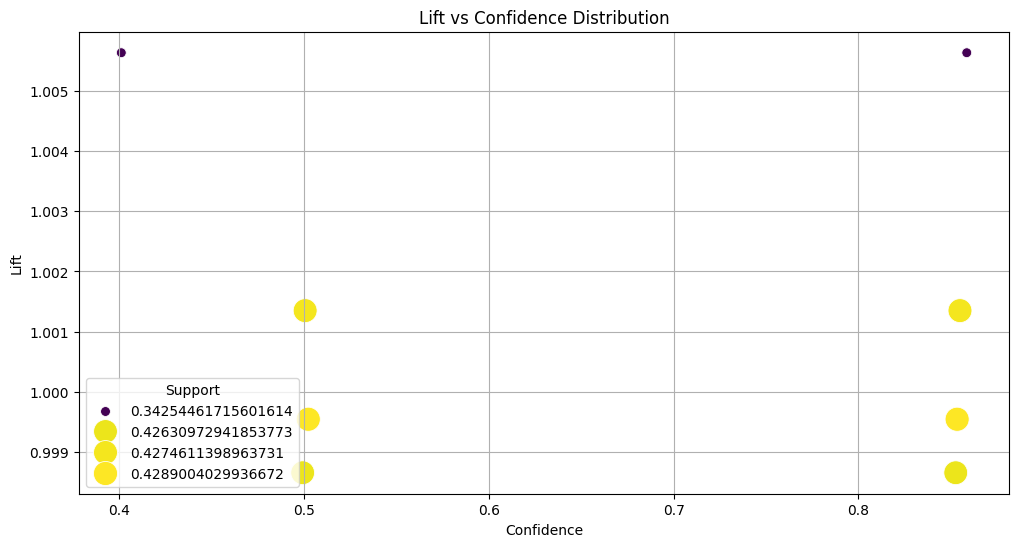

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# 연관 규칙 데이터프레임 (rules)을 활용

# 1. 그래프 네트워크 시각화
def plot_association_rules_graph(rules):
    G = nx.DiGraph()  # 방향 그래프 생성

    # 그래프 노드 및 엣지 추가
    for _, rule in rules.iterrows():
        for antecedent in rule['antecedents']:
            for consequent in rule['consequents']:
                G.add_edge(antecedent, consequent, weight=rule['lift'])

    # 노드 크기는 degree 기준
    node_sizes = [800 + G.degree(n) * 100 for n in G.nodes()]
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

    pos = nx.spring_layout(G)  # 노드 레이아웃
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue")
    nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray")
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    plt.title("Association Rules Graph", fontsize=15)
    plt.show()

# 2. Lift와 Confidence 분포 시각화
def plot_rule_distributions(rules):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=rules, x="confidence", y="lift", hue="support", size="support", sizes=(50, 300), palette="viridis")
    plt.title("Lift vs Confidence Distribution")
    plt.xlabel("Confidence")
    plt.ylabel("Lift")
    plt.legend(title="Support")
    plt.grid(True)
    plt.show()

# 실행
plot_association_rules_graph(sorted_rules)  # 그래프 네트워크
plot_rule_distributions(sorted_rules)  # 분포 시각화


## 주요 노드들:
EmploymentStatus=Employed: 고용 상태가 "Employed(고용됨)"인 속성.  
LoanApproved=Approved: 대출이 승인된 경우.  
LoanApproved=NotApproved: 대출이 승인되지 않은 경우.  
MaritalStatus=Married: 결혼 상태가 "Married(기혼)"인 경우.  
HomeOwnershipStatus=Mortgage: 주택 소유 상태가 "Mortgage(담보 대출)"인 경우.  
  
## 연결 해석:
EmploymentStatus=Employed는 여러 속성과 직접 연결되어 있다. 이는 고용 상태가 대출 승인 여부와 주택 소유 상태와 밀접한 관련이 있음을 나타낸다.  
LoanApproved=Approved와 EmploymentStatus=Employed의 연결은 고용 상태가 "Employed"일 때 대출이 승인될 가능성이 높다는 것을 의미할 수 있다.    
반대로, LoanApproved=NotApproved와의 연결은 고용 상태가 여전히 대출 승인 실패와도 관련이 있음을 보여줄 수 있습니다.  
MaritalStatus=Married와의 연결은 기혼 상태가 고용 상태 및 대출 승인 여부와 연관이 있음.  
HomeOwnershipStatus=Mortgage와의 연결은 담보 대출 상태가 고용 상태와 연관이 있음을 나타낸다.    
  
## 종합 해석:
고용 상태(EmploymentStatus)가 대출 승인 여부, 결혼 상태, 주택 소유 상태와 중요한 연관성을 가지고 있다.  
특히, 대출 승인(LoanApproved=Approved) 여부는 고용 상태와 밀접한 관계가 있으며, 이는 대출 심사 과정에서 소득 안정성(고용 여부)이 주요 요인임을 시사.  
기혼자와 담보 대출 상태 역시 고용 상태와 대출 승인 여부에 영향을 미칠 가능성이 있음.

In [16]:
# 나이 및 대출 승인 여부에 따른 그룹화
def analyze_by_group(df, rules, age_ranges, target_col="LoanApproved"):
    for start, end in age_ranges:
        # 나이 범위에 따른 필터링
        group_df = df[(df['Age'] >= start) & (df['Age'] <= end)]
        print(f"\n=== 연령대: {start}~{end} ===")

        for status in group_df[target_col].unique():
            sub_df = group_df[group_df[target_col] == status]
            print(f"\n[대출 승인 상태: {status}] 데이터 수: {len(sub_df)}")

            # One-hot encoding 후 연관 규칙 분석
            sub_one_hot = pd.get_dummies(sub_df, drop_first=False)
            frequent_itemsets = apriori(sub_one_hot, min_support=0.2, use_colnames=True)
            sub_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

            # Lift 상위 5개 출력
            print("\n연관 규칙 (Lift 상위 5개):")
            print(sub_rules.sort_values(by="lift", ascending=False).head(5))

            # 규칙 분포 시각화
            if not sub_rules.empty:
                plot_rule_distributions(sub_rules)

# 나이 범위 정의 및 실행
age_ranges = [(20, 25), (26, 30), (31, 35)]
analyze_by_group(df, sorted_rules, age_ranges)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: '>=' not supported between instances of 'str' and 'int'

In [23]:
pip install -U mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
pip install --upgrade mlxtend


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


데이터 샘플:
  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724

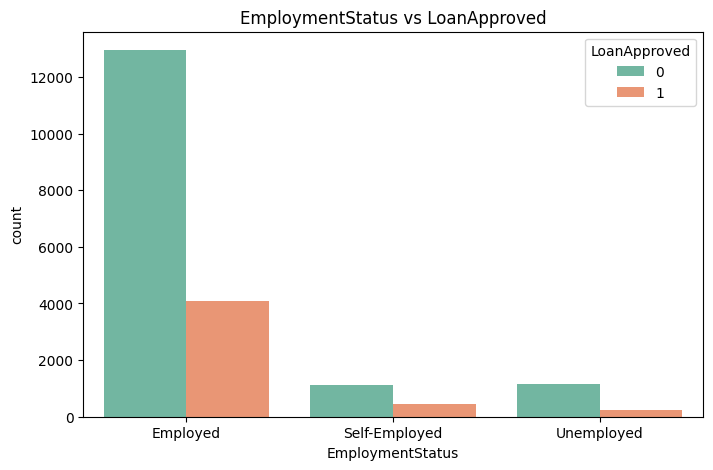

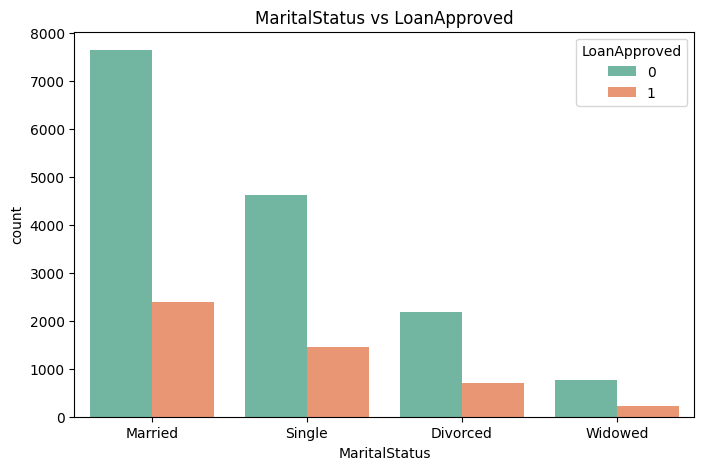

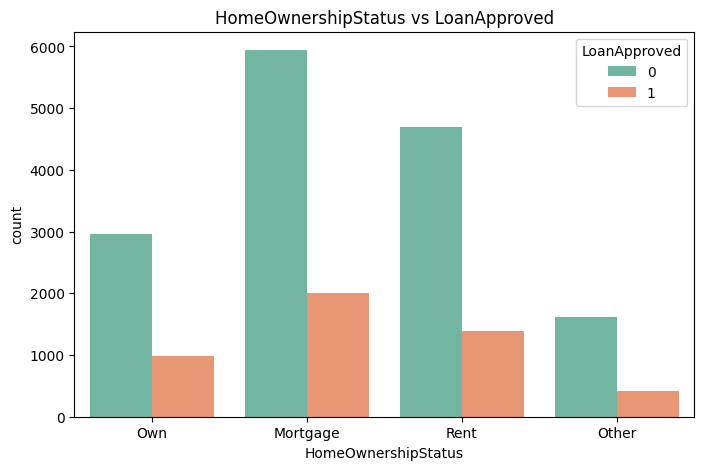

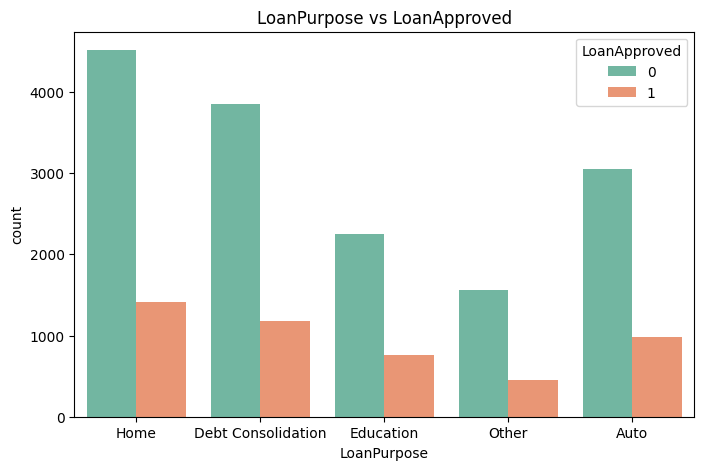


더미화된 데이터:
   EmploymentStatus_Employed  EmploymentStatus_Self-Employed  \
0                       True                           False   
1                       True                           False   
2                       True                           False   
3                       True                           False   
4                       True                           False   

   EmploymentStatus_Unemployed  MaritalStatus_Divorced  MaritalStatus_Married  \
0                        False                   False                   True   
1                        False                   False                  False   
2                        False                   False                   True   
3                        False                   False                  False   
4                        False                   False                   True   

   MaritalStatus_Single  MaritalStatus_Widowed  HomeOwnershipStatus_Mortgage  \
0                 False              

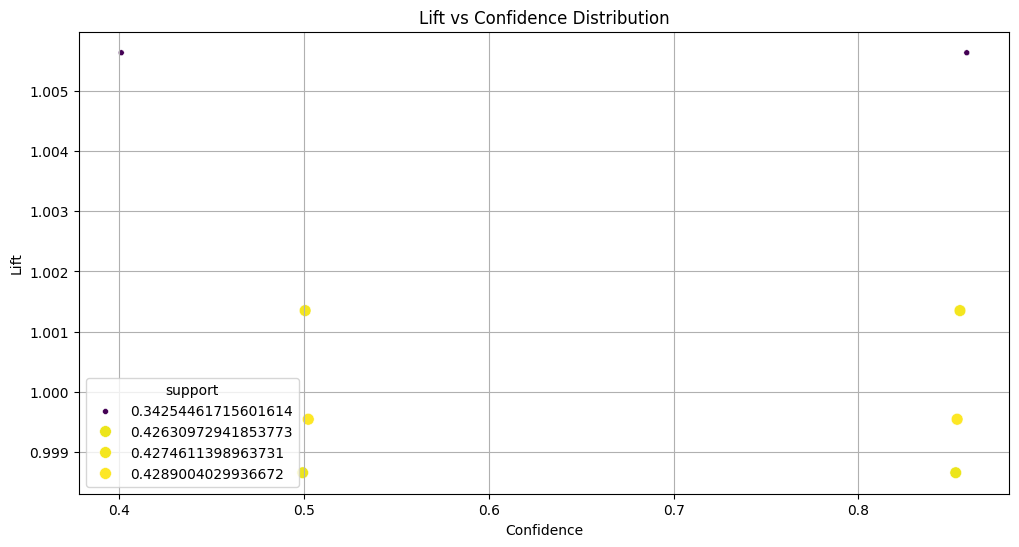


스케일링 적용 후 데이터:
  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617              정규직   
1      2018-01-02   38         39709          628              정규직   
2      2018-01-03   47         40724          570              정규직   
3      2018-01-04   58         69084          545              정규직   
4      2018-01-05   37        103264          594              정규직   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                

In [30]:
# 1. 필요한 라이브러리 설치 및 데이터 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# 데이터 로드
file_path = "/content/drive/MyDrive/youngrich/data/Loan.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 데이터 확인
print("데이터 샘플:")
print(df.head())

# 2. 데이터 전처리
# 결측치 확인 및 제거
print("\n결측값 확인:")
print(df.isnull().sum())
df.dropna(inplace=True)

# 범주형 변수 간 관계 분석
categorical_vars = ["EmploymentStatus", "MaritalStatus", "HomeOwnershipStatus", "LoanPurpose"]
df[categorical_vars + ['LoanApproved']] = df[categorical_vars + ['LoanApproved']].astype(str)

# 3. 변수와 대출 승인 여부 관계 분석
print("\n대출 승인 여부와 변수 간 관계 분석:")
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=var, hue="LoanApproved", palette="Set2")
    plt.title(f"{var} vs LoanApproved")
    plt.show()

# 4. 연관 규칙 분석
# 범주형 변수를 더미화
df_encoded = pd.get_dummies(df[categorical_vars + ["LoanApproved"]])
print("\n더미화된 데이터:")
print(df_encoded.head())

# Apriori 알고리즘 적용
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
print("\n빈발 항목 집합:")
print(frequent_itemsets)

# 연관 규칙 생성
# association_rules()에 num_itemsets를 전달하지 않고 metric과 min_threshold만 적용
try:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    print("\n연관 규칙:")
    print(rules)
except TypeError as e:
    print(f"에러 발생: {e}")

# 5. 연관 규칙 시각화
# Lift vs Confidence 분포
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=rules,
    x="confidence",
    y="lift",
    hue="support",
    size="support",
    palette="viridis"
)
plt.title("Lift vs Confidence Distribution")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.grid(True)
plt.show()

# 6. 스케일링 적용 (한국 데이터 기준 예시)
# EmploymentStatus 매핑
employment_mapping = {
    "Employed": "정규직",
    "Unemployed": "실업",
    "Self-Employed": "자영업",
    "Retired": "퇴직"
}
df["EmploymentStatus"] = df["EmploymentStatus"].map(employment_mapping)

# 결과 확인
print("\n스케일링 적용 후 데이터:")
print(df.head())
